<a href="https://colab.research.google.com/github/elinteerie/Pytorch/blob/main/Getting_Started_With_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
import torch

import os

import numpy as np
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

from torch import nn, optim

import torch.nn.functional as F


RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [203]:
file = '/content/drive/MyDrive/datafiles/weatherAUS.csv'

In [204]:
df = pd.read_csv(file)

In [205]:
df.shape

(145460, 23)

In [206]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [207]:
cols = ['Rainfall', 'Humidity3pm', 'Pressure9am', 'RainToday', 'RainTomorrow']

In [208]:
df = df[cols]

In [209]:
df.shape

(145460, 5)

In [210]:
df.RainToday

0         No
1         No
2         No
3         No
4         No
          ..
145455    No
145456    No
145457    No
145458    No
145459    No
Name: RainToday, Length: 145460, dtype: object

In [211]:
df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

In [212]:
df.RainToday.unique()

array([ 0.,  1., nan])

In [213]:
df = df.dropna(how='any')

In [214]:
df.shape

(124689, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


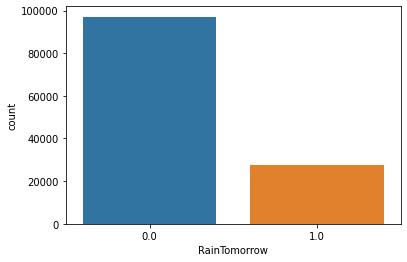

In [215]:
sns.countplot(df.RainTomorrow);

In [216]:
df.shape[0]

124689

In [217]:
df.RainTomorrow.value_counts()/ df.shape[0] *100

0.0    77.876156
1.0    22.123844
Name: RainTomorrow, dtype: float64

In [218]:
df.shape[0]

124689

In [219]:
X = df[['Rainfall', 'Humidity3pm', 'RainToday', 'Pressure9am']]
y = df[['RainTomorrow']]

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state= RANDOM_SEED)

In [221]:
#Convert to Tensor
X_train = torch.from_numpy(X_train.to_numpy()).float()
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())

In [222]:
#Convert to Tensor
X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())

In [223]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([99751, 4]) torch.Size([99751])
torch.Size([24938, 4]) torch.Size([24938])


In [224]:
class Net(nn.Module):
  def __init__(self, n_features):
    super().__init__()
    self.fc1 = nn.Linear(n_features, 5)
    self.fc2 = nn.Linear(5, 3)
    self.fc3 = nn.Linear(3, 1)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return torch.sigmoid(self.fc3(x))

In [225]:
net = Net(X_train.shape[1])
net.state_dict()

OrderedDict([('fc1.weight', tensor([[ 0.3823,  0.4150, -0.1171,  0.4593],
                      [-0.1096,  0.1009, -0.2434,  0.2936],
                      [ 0.4408, -0.3668,  0.4346,  0.0936],
                      [ 0.3694,  0.0677,  0.2411, -0.0706],
                      [ 0.3854,  0.0739, -0.2334,  0.1274]])),
             ('fc1.bias',
              tensor([-0.2304, -0.0586, -0.2031,  0.3317, -0.3947])),
             ('fc2.weight',
              tensor([[-0.2062, -0.1263, -0.2689,  0.0422, -0.4417],
                      [ 0.4039, -0.3799,  0.3453,  0.0744, -0.1452],
                      [ 0.2764,  0.0697,  0.3613,  0.0489, -0.1410]])),
             ('fc2.bias', tensor([ 0.1202, -0.1213,  0.1882])),
             ('fc3.weight', tensor([[ 0.5155,  0.3337, -0.2524]])),
             ('fc3.bias', tensor([0.3333]))])

In [226]:
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001)

In [227]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [228]:
X_train = X_train.to(device)
y_train = y_train.to(device)


X_test = X_test.to(device)
y_test = y_test.to(device)



In [229]:
net = net.to(device)
criterion = criterion.to(device)

In [230]:
for epoch in range(1000):
  y_pred = net(X_train)

  y_pred = torch.squeeze(y_pred)
  train_loss = criterion(y_pred, y_train)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()
  if epoch % 100 == 0: 

     print(f' {epoch} - Loss: {train_loss.item()} ')

 0 - Loss: 2.512702465057373 
 100 - Loss: 0.4570438861846924 
 200 - Loss: 0.43474313616752625 
 300 - Loss: 0.420562744140625 
 400 - Loss: 0.4123978614807129 
 500 - Loss: 0.40799230337142944 
 600 - Loss: 0.4057587683200836 
 700 - Loss: 0.40467944741249084 
 800 - Loss: 0.4041593372821808 
 900 - Loss: 0.4038848876953125 


In [231]:
y_pred = torch.round(y_pred)

In [232]:
classes = ['No rain', 'Raining']

y_pred = net(X_test)

y_pred = y_pred.ge(.5).view(-1).cpu()
y_test = y_test.cpu()

print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

     No rain       0.85      0.96      0.90     19413
     Raining       0.74      0.40      0.52      5525

    accuracy                           0.84     24938
   macro avg       0.80      0.68      0.71     24938
weighted avg       0.83      0.84      0.82     24938

